#                 Students Adaptability Level in Online Education

![](https://er.educause.edu/-/media/images/blogs/2020/8/er20_3206_706x394_blog.jpg?hash=6BCDA470A42BF8086319452828355A6BE4BC96CD&la=en)

## INTRODUCTION
## ABOUT- DATASET:
The COVID-19 pandemic led to an unexpected and rapid shift to remote learning for students around the world. In the space of a few weeks, the very nature of learning and instruction was transformed. Learning and instruction moved to remote online modes at speed and scale. The extent to which students have successfully responded and adjusted to these disruptions has been key to how they have coped academically. This being the case, adaptability may be a personal attribute that is highly relevant through times of online remote learning and instruction, such as during COVID-19 and any other future periods of disrupted learning. Adaptability is the capacity to regulate one’s behaviors, thoughts, and feelings in response to novel, variable, uncertain, and unexpected situations and circumstances. Adaptability has been identified as an important capacity for students’ academic and personal development, including their motivation, engagement, achievement, and social-emotional wellbeing. Given adaptability is specifically aimed at successfully navigating change, uncertainty, and novelty, it is also likely a vital personal attribute to support students during periods of novelty, variability, and uncertainty, such as with COVID-19 restrictions and lockdowns, including periods of online learning through these times. To the extent that adaptability is associated with positive educational processes and outcomes during online learning, it may be an important area of focus for educational interventions.
## ABOUT- PROJECT:
This Exploratory Data Analysis project is a part of "Data Analysis with Python: Zero to Pandas" course structured and provided by Jovian. The aim of this research was to expand current knowledge of adaptability by focusing on its role in students’ academic development and online learning during a period of COVID-19 that entailed fully or partially remote online learning. we examined the role of adaptability in predicting students’ online learning self-efficacy and their end of year achievement. We were particularly interested in the extent to which adaptability (a personal resource) played a role in students’ online learning self-efficacy and achievement beyond the effects of any online learning demands, online and parental learning support, and background attributes.The graphical representation and visualisation of data using matplotlib and seaborn library in python helps us to easily understand a lot better about the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno
import warnings
warnings.filterwarnings('ignore')

## Data Preparation and Cleaning

Let's load the CSV files using the Pandas library. We'll use the name "student_df" for the data frame to indicate this is unprocessed data that we might clean, filter and modify to prepare a data frame ready for analysis. We'll perform data preparation and cleaning operations on "student_df".

In [4]:
#convert the csv file into pandas data frame 
student_df=pd.read_csv('students_adaptability_level_online_education.csv')

In [5]:
student_df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [6]:
student_df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [7]:
student_df.shape

(1205, 14)

* Total Rows-> 1205
* Total Columns-> 14

In [8]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some non-empty values since the Non-Null count for every column is same as the total number of rows(1205). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

In [9]:
student_df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

Now, we see that there are spaces(' ') and hyphen('-') in column names and we remove them by replacing them with ('_') to access them easily while analyzing the data using column names.

In [10]:
# remove spaces in columns name
student_df.columns = student_df.columns.str.replace(' ','_')
student_df.columns = student_df.columns.str.replace('-','_')

In [11]:
student_df

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


Now, column names are easily accessible.

In [12]:
student_df.describe()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [13]:
student_df['Gender'].value_counts()

Gender
Boy     663
Girl    542
Name: count, dtype: int64

#### Check for null values in data frame
isna().any() function returns 'True', if there's any null (Nan) value in data frame and returns False if there's no null value.

In [14]:
overall=student_df.isna().any()  
overall

Gender                 False
Age                    False
Education_Level        False
Institution_Type       False
IT_Student             False
Location               False
Load_shedding          False
Financial_Condition    False
Internet_Type          False
Network_Type           False
Class_Duration         False
Self_Lms               False
Device                 False
Adaptivity_Level       False
dtype: bool

From the above result, it's clear that there's no null values present in our data frame. If there's limited number of columns, we can also check whether a column has null value or not using info() function.

In [15]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education_Level      1205 non-null   object
 3   Institution_Type     1205 non-null   object
 4   IT_Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load_shedding        1205 non-null   object
 7   Financial_Condition  1205 non-null   object
 8   Internet_Type        1205 non-null   object
 9   Network_Type         1205 non-null   object
 10  Class_Duration       1205 non-null   object
 11  Self_Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity_Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


info() function in pandas module is used to view some basic information of a data frame. From the above output, we can clearly see that there are 1205 rows and 14 columns and there's no null value. Also we can see the data types of each column in the data frame.

In [16]:
student_df.Financial_Condition.unique()

array(['Mid', 'Poor', 'Rich'], dtype=object)

In [17]:
student_df.Age.unique()

array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object)

In [18]:
student_df.Class_Duration.unique()

array(['3-6', '1-3', '0'], dtype=object)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [19]:
student_df.sample(10)

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
378,Girl,1-5,School,Non Government,No,Yes,Low,Poor,Mobile Data,4G,1-3,No,Mobile,Moderate
820,Girl,1-5,School,Non Government,No,Yes,Low,Poor,Mobile Data,4G,1-3,No,Mobile,Moderate
797,Boy,21-25,University,Government,No,Yes,Low,Mid,Mobile Data,4G,3-6,No,Mobile,Moderate
835,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1126,Boy,21-25,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3-6,No,Computer,Low
707,Girl,1-5,School,Non Government,No,Yes,Low,Poor,Mobile Data,4G,1-3,No,Mobile,Moderate
480,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,3G,1-3,No,Mobile,Moderate
521,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
661,Girl,1-5,School,Non Government,No,Yes,Low,Poor,Mobile Data,4G,1-3,No,Mobile,Moderate
369,Girl,16-20,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., Age, Location, Financial Condition, Education level, Device, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide student community. A survey of this scale generally tends to have some selection bias.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### INTERNET TYPE: WIFI OR MOBILE DATA
It'd be interesting to see the comparison between the total number of wifi and mobile data users in this dataset just to get an idea of which one majority uses.

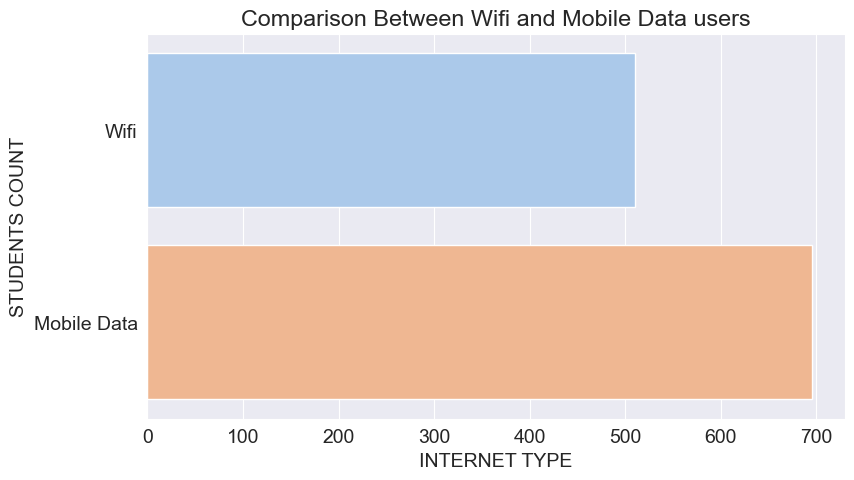

In [21]:
plt.figure(figsize=(9,5))
g=sns.countplot(student_df.Internet_Type,palette="pastel");
plt.title("Comparison Between Wifi and Mobile Data users")
plt.xlabel('INTERNET TYPE')
plt.ylabel('STUDENTS COUNT')
plt.show();

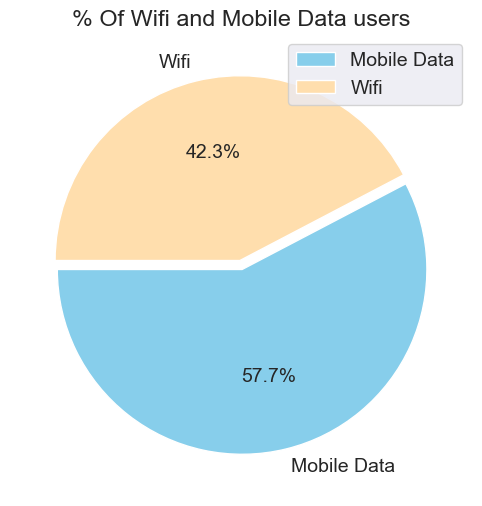

In [22]:
plt.figure(figsize=(12,6))
plt.title("% Of Wifi and Mobile Data users")
g = plt.pie(student_df.Internet_Type.value_counts(), explode=(0.025,0.025), labels=student_df.Internet_Type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show();

So there are roughly 1205 students experiencing online education. Now, the online education need Internet connection which can be provided by WIFI or Mobile Data. Now, using bar chart and pie chart we can clearly see that there are more students who attend online eduction using mobile data rather than using WIFI. Data is 42.3% by WIFI and 57.7% by Mobile Data and difference is 15.4%.

### TYPE OF DEVICE FOR ONLINE EDUCATION
It'd be interesting to see the comparison between the total number of Mobile, Computer, and Tab device users in this dataset just to get an idea of which one majority uses for online eduction.

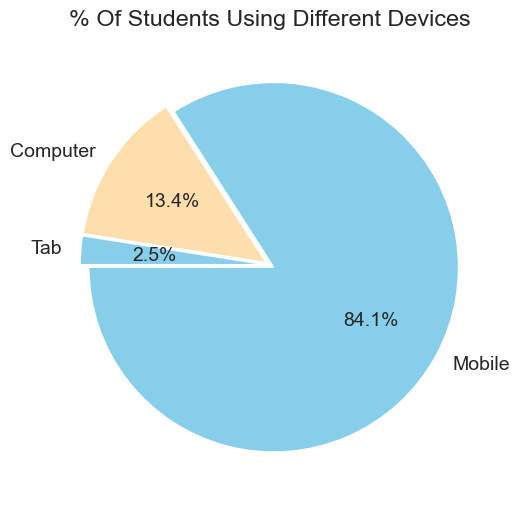

In [23]:
plt.figure(figsize=(12, 6))
g = plt.pie(student_df.Device.value_counts(), explode=(0.025,0.025,0.025), labels=student_df.Device.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.title("% Of Students Using Different Devices");

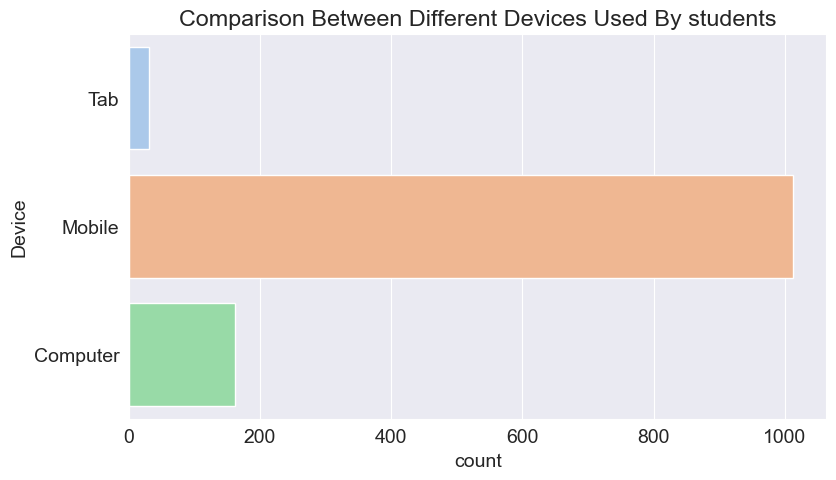

In [24]:
plt.figure(figsize=(9,5))
g=sns.countplot(student_df.Device,palette="pastel");
plt.title("Comparison Between Different Devices Used By students")
plt.show();

So there are roughly 1205 students experiencing online education. Now, for online education, some Device for watching lectures is required which can be provided by Mobile or Computer or Tab. Now, using bar chart and pie chart we can clearly see that there are more students who attend online eduction using Mobile rather than using Computer and least used is Tab. Data shows 84.1% by Mobile and 13.4% by Computer and 2.5% by Tab.From this, we can conclude that either Mobile are affordable than Computer or students finds more comfortable to study on Mobile rather than Computer.

### ADAPTIVITY LEVEL OF DIFFERENT STUDENTS
It'd be interesting to see the comparison between the Adaptivity level of different students in this dataset just to get an idea of how much students are comfortable with online eduction at home.

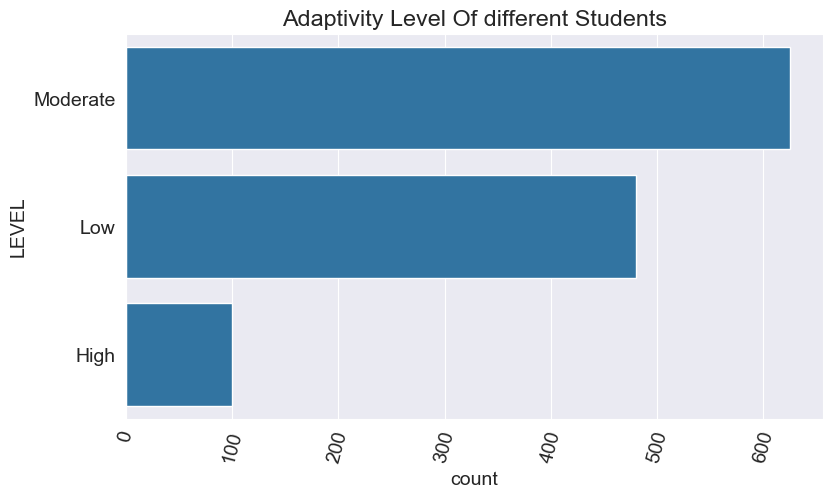

In [25]:
sns.countplot(y=student_df.Adaptivity_Level)
plt.xticks(rotation=75);
plt.title("Adaptivity Level Of different Students")
plt.ylabel("LEVEL");

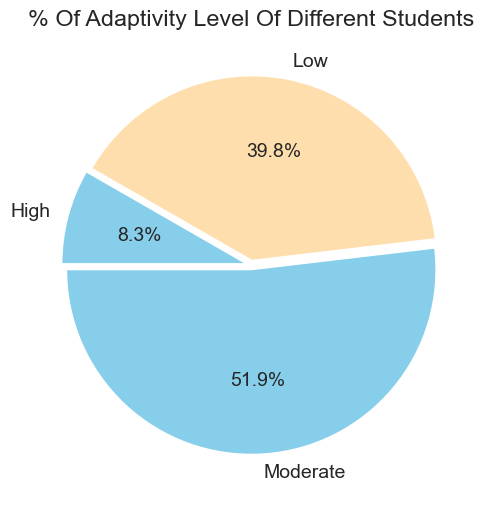

In [26]:
plt.figure(figsize=(12, 6))
g = plt.pie(student_df.Adaptivity_Level.value_counts(), explode=(0.025,0.025,0.025), labels=student_df.Adaptivity_Level.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.title("% Of Adaptivity Level Of Different Students");

So there are roughly 1205 students experiencing online education. Adaptivity is another important feature in modern software systems, e.g., online education, mobile applications. Like dependability, adaptivity depends on the interactive environment of the system.Now, for different students adaptivity level of online education is different categorised into Low, Moderate, High Level. Now, using bar chart and pie chart we can clearly see that there are more students having Moderate adaptivity level of online education but also it is seen that a large number of students also have low adaptivity level of online education. Data shows 51.9% Moderate and 39.8% Low and 8.3% High adaptivity level. From this, we can conclude that most students are not finding comfortable in online education.

### FINANCIAL CONDITION OF STUDENTS
It'd be interesting to see the comparison between the total number of Rich, Poor, and Mild wealth student users in this dataset just to get an idea of which are able to afford online eduction.

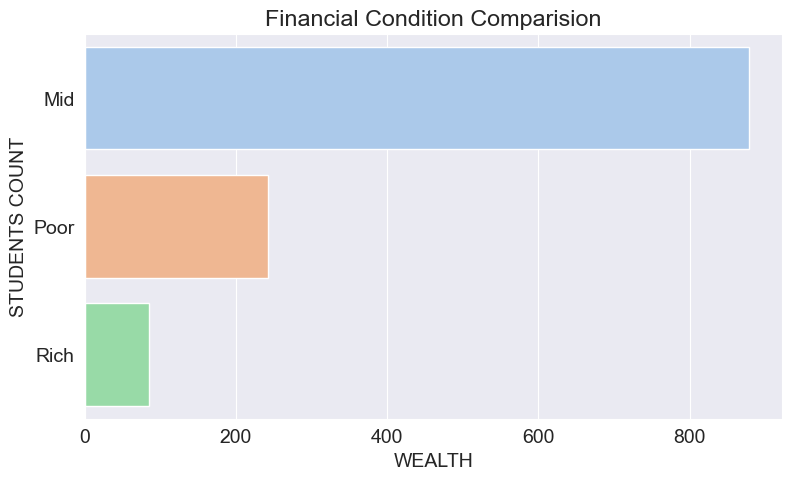

In [27]:
plt.figure(figsize=(9,5))
g=sns.countplot(student_df.Financial_Condition,palette="pastel");
plt.title("Financial Condition Comparision")
plt.xlabel('WEALTH')
plt.ylabel('STUDENTS COUNT')
plt.show();

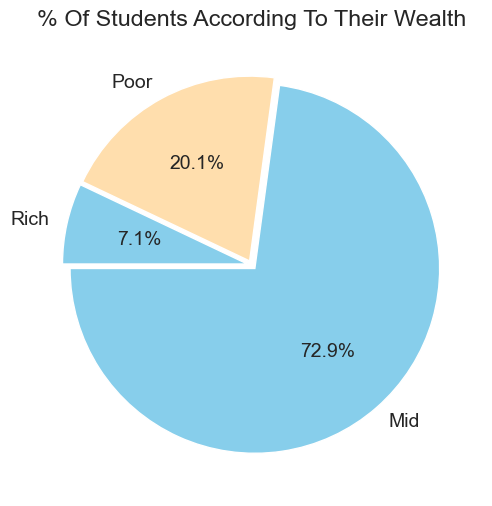

In [28]:
plt.figure(figsize=(12, 6))
g = plt.pie(student_df.Financial_Condition.value_counts(), explode=(0.025,0.025,0.025), labels=student_df.Financial_Condition.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.title("% Of Students According To Their Wealth");

So there are roughly 1205 students experiencing online education. Now, for online education, some Device for watching lectures is required which can be provided by Mobile or Computer or Tab and these are not cheap to buy so here we compare Financial condition of different students. Now, using bar chart and pie chart we can clearly see that there are more students who have Mild Financial condition and a few have Poor financial condition. Data shows 72.9% students having Mild and 20.1% Poor and 7.1% Rich Financial condition.From this, we can conclude most students can have a mobile or a computer to attend online lectures.

### NETWORK TYPES STUDENTS USES
It'd be interesting to see the comparison between different network types i wealth student users in this dataset just to get an idea of which are able to afford online eduction.

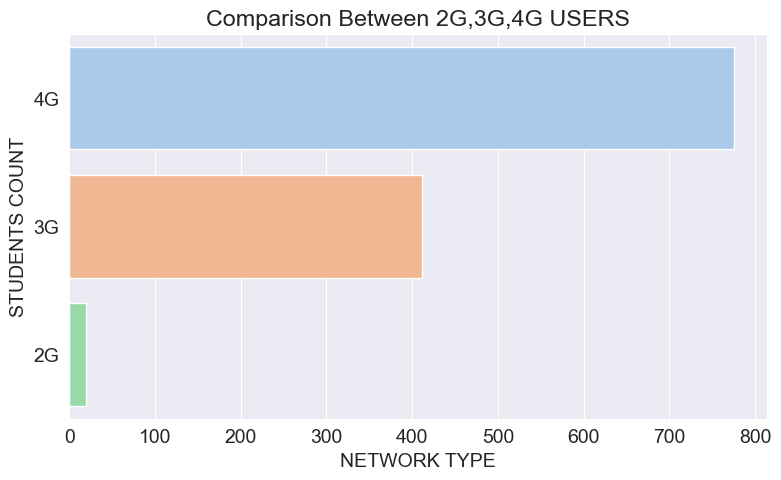

In [29]:
plt.figure(figsize=(9,5))
g=sns.countplot(student_df.Network_Type,palette="pastel");
plt.title("Comparison Between 2G,3G,4G USERS")
plt.xlabel('NETWORK TYPE')
plt.ylabel('STUDENTS COUNT')
plt.show();

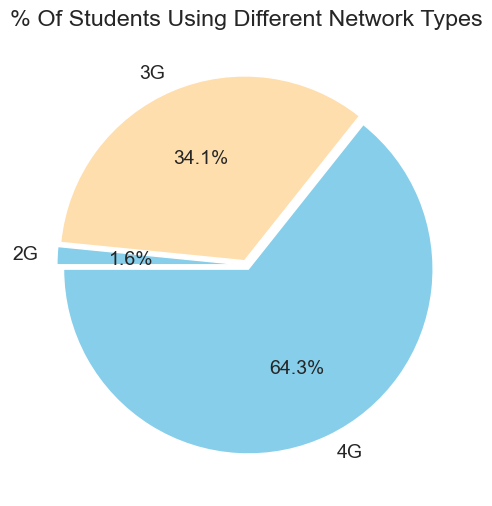

In [30]:
plt.figure(figsize=(12, 6))
g = plt.pie(student_df.Network_Type.value_counts(), explode=(0.025,0.025,.025), labels=student_df.Network_Type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.title("% Of Students Using Different Network Types");

So there are roughly 1205 students experiencing online education. Now, for online education, Internet connection is required which comes under 3 categories i.e. 2G,3G,4G. Now, using bar chart and pie chart we can clearly see that there are more students who attend online eduction using 4G Internet type rather than using 3G Internet type and least used is 2G. Data shows 64.3% 4G and 34.1% 3G and 1.6% 2G Network type is used by students.From this, we can conclude that most students are getting good type of network type to attend online education.

## Asking and Answering Questions

As part of this data analysis, it is very crucial to raise question and find answer to them. Here we will try to find out some of the most essential questions, that will help us in drawing a major conclusion from our dataset.

### Q1: Does online education increased or decreased studies load on students?

In [31]:
load=student_df.Load_shedding.value_counts()
load

Load_shedding
Low     1004
High     201
Name: count, dtype: int64

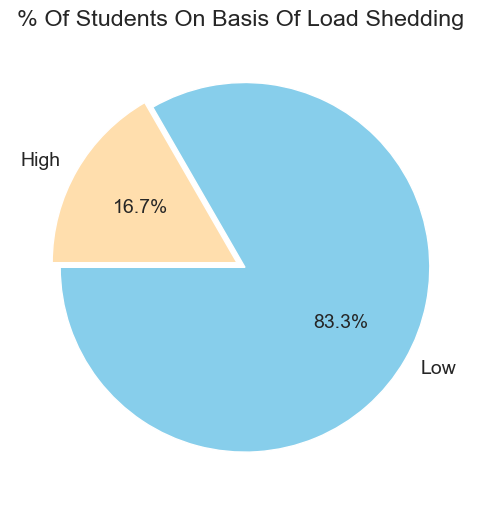

In [32]:
plt.figure(figsize=(12, 6))
g = plt.pie(student_df.Load_shedding.value_counts(), explode=(0.025,0.025), labels=student_df.Load_shedding.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.title("% Of Students On Basis Of Load Shedding");

From above it is evident that load of studies with online education has decreased significantly on many students. Data shows 83.3% students have low load and only 16.7% students have more load of studying with online education. 

### Q2: How many students are IT students i.e. having computer science as a subject?

In [33]:
it=student_df.IT_Student.value_counts()
it

IT_Student
No     901
Yes    304
Name: count, dtype: int64

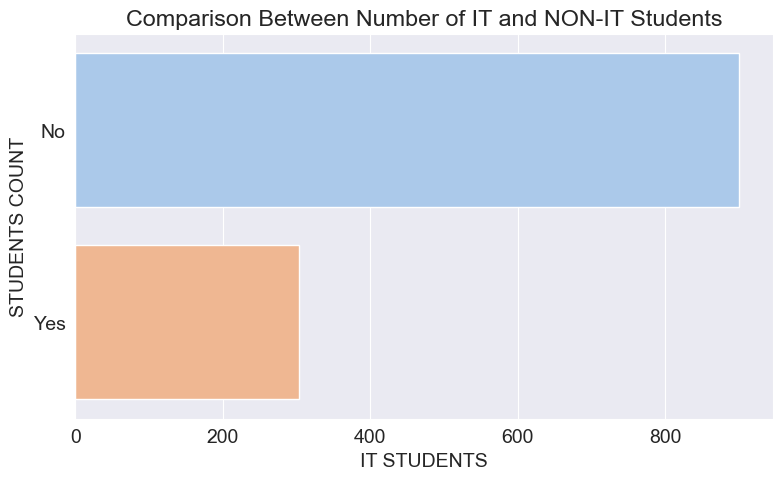

In [34]:
plt.figure(figsize=(9,5))
g=sns.countplot(student_df.IT_Student,palette="pastel");
plt.title("Comparison Between Number of IT and NON-IT Students")
plt.xlabel('IT STUDENTS')
plt.ylabel('STUDENTS COUNT')
plt.show();

From above it is evident that Non-IT students are more but they are able to attend online lectures inspite of having no or less computer experience showing that attending online lectures is very easy requiring little computer knowledge. Data shows 901 NON-IT students and only 304 IT students, all can access online education.

### Q3: How much is the class duration during online lectures?

In [35]:
duration=student_df.Class_Duration.value_counts()
duration

Class_Duration
1-3    840
3-6    211
0      154
Name: count, dtype: int64

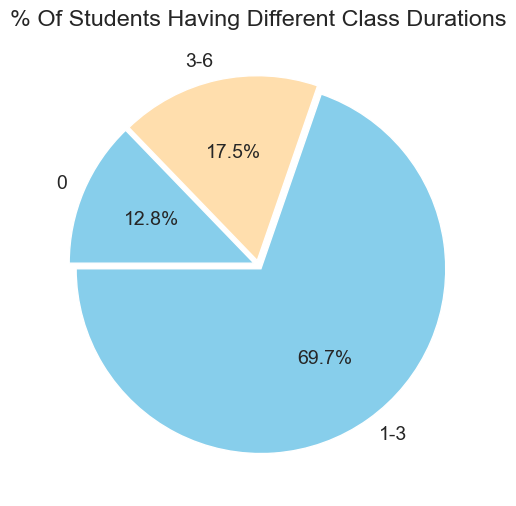

In [36]:
plt.figure(figsize=(12, 6))
g = plt.pie(student_df.Class_Duration.value_counts(), explode=(0.025,0.025,.025), labels=student_df.Class_Duration.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.title("% Of Students Having Different Class Durations");

From above it is evident that most students are having 1-3 hours of class duration which is a good sign of less load of studies on students and less screen time of students helps students to be more focused during the class and also it reduces strain on eyes. Data shows 840(69.7%) students have 1-3 hours and 211(17.5%) students have 3-6 hours of class duration and 154(12.8%) are not attending online lectures inspite of having internet connection and a device.

### Q4: Find total number of government and non-government institute students?

In [37]:
institute=student_df.Institution_Type.value_counts()
institute

Institution_Type
Non Government    823
Government        382
Name: count, dtype: int64

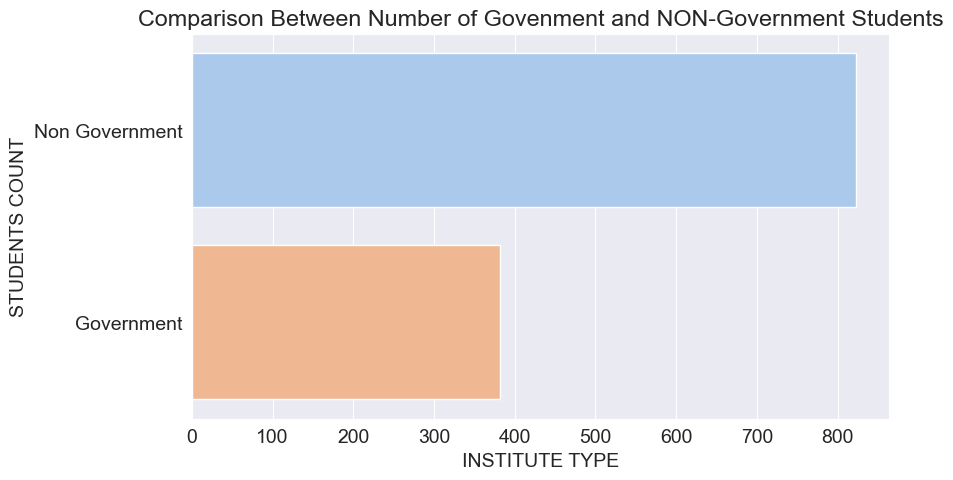

In [38]:
plt.figure(figsize=(9,5))
g=sns.countplot(student_df.Institution_Type,palette="pastel");
plt.title("Comparison Between Number of Govenment and NON-Government Students")
plt.xlabel('INSTITUTE TYPE')
plt.ylabel('STUDENTS COUNT')
plt.show();

From above it is evident that number of Non-Government students are more than Government students and both type of institute students can attend online lectures. Data shows 823 NON-Government students and only 382 Government students, all can access online education.

### Q5: What are the total number of  students of different age groups attending online classes?

In [39]:
age=student_df.Age.value_counts()
age

Age
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: count, dtype: int64

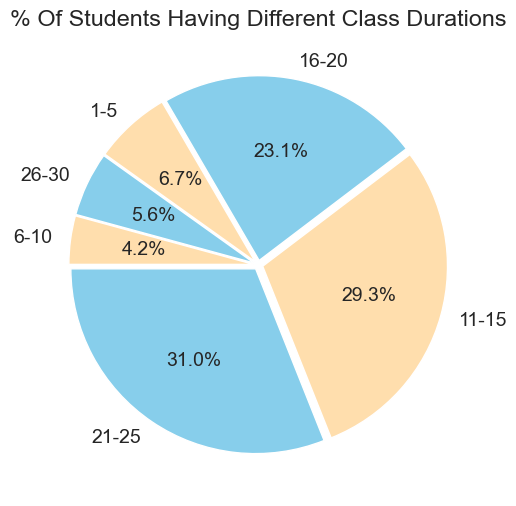

In [40]:
plt.figure(figsize=(12, 6))
g = plt.pie(student_df.Age.value_counts(), explode=(0.025,0.025,.025,.025,.025,.025), labels=student_df.Age.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.title("% Of Students Having Different Class Durations");

From above it is evident that number of students in age group of 21-25 and 11-15 is more than any other age groups attending online lectures. It is also evident that student's age between 11-25 had to study more or level of study is hard in India and graduation is also completed upto age 25 and after that most students find a job. Data is 374 students in age group 21-25 and 353 students in age group 11-15 and 278 students in age group 16-20 and 81 students in age group 1-5 and 68 students in age group 26-30 and 51 students in age group 6-10.

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:
* Based on the student responds there are more students who attend online eduction using mobile data rather than using WIFI. Data shows 42.3% students use WIFI and 57.7% students use Mobile Data.

* Based on the student responds there are more students who attend online eduction using Mobile rather than using Computer and least used is Tab. Data shows 84.1% by Mobile.From this, we can conclude that either Mobile are affordable than Computer or students finds more comfortable to study on Mobile rather than Computer.

* Based on the student responds there are more students having Moderate adaptivity level of online education but also it is seen that a large number of students also have low adaptivity level of online education. Data shows 51.9% Moderate and 39.8% Low. From this, we can conclude that most students are not finding comfortable in online education.
* Based on the student responds that there are more students who attend online eduction using 4G Internet type rather than using 3G Internet type and least used is 2G. Data shows 64.3% 4G and 34.1% 3G is used by students.From this, we can conclude that most students are getting good type of network type to attend online education.
* Based on the student responds load of studies with online education has decreased significantly on many students. Data shows 83.3% students have low load and only 16.7% students have more load of studying with online education.
* Based on the student responds Non-IT students are more but they are able to attend online lectures inspite of having no or less computer experience showing that attending online lectures is very easy requiring little computer knowledge. Data shows 901 NON-IT students and only 304 IT students, all can access online education.
* Based on the student respondsBased on the student responds  that number of Non-Government students are more than Government students and both type of institute students can attend online lectures. Data shows 823 NON-Government students and only 382 Government students, all can access online education.
* Based on the student responds that number of students in age group of 21-25 and 11-15 is more than any other age groups attending online lectures. It is also evident that student's age between 11-25 had to study more or level of study is hard in India and graduation is also completed upto age 25 and after that most students find a job. Data is 374 students in age group 21-25 and 353 students in age group 11-15 and 278 students in age group 16-20 and 81 students in age group 1-5 and 68 students in age group 26-30 and 51 students in age group 6-10.
* So, we can conclude that online education is easy to access and in less cost you can get quality education at home at your comfort and it requires less or little knowledge of using computer, mobile and internet and everyone can access online lectures easily.

## References 

Check out the following resources to learn more about the dataset and tools used in this notebook:
* Adaptivity Level of online education survey dataset: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education.
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* opendatasets Python library: https://github.com/JovianML/opendatasets

As a next step, you can try out a project on another dataset of your choice: https://jovian.ml/aakashns/zerotopandas-course-project-starter .

# Future Work

There's a wealth of information to be discovered using the survey, and we've barely scratched the surface. Here are some ideas for further exploration:
* Repeat the analysis for different age groups & genders, and compare the results.
* Pick a different set of columns to analyze other facets of the data.
* Prepare an analysis focusing on diversity and identify areas where underrepresented communities are at par with the majority (e.g., education) and where they aren't (e.g., salaries).
* Compare the results of this year's survey with the previous years and identify interesting trends.